In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('Customer Churn.csv')

In [25]:
df.head()

,Customer_ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,22378,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,22379,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,22380,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,22381,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,22382,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [26]:
# About Dataset
data_dict = {
    "Column": [
        "Customer ID"
        "Call Failure",
        "Complains",
        "Subscription Length",
        "Charge Amount",
        "Seconds of Use",
        "Frequency of Use",
        "Frequency of SMS",
        "Distinct Called Numbers",
        "Age Group",
        "Tariff Plan",
        "Status",
        "Age",
        "Customer Value",
        "Churn",
    ],
    "Explanation": [
        "Unique Customer Reference"
        "Number of call failures",
        "Binary (0: No complaint, 1: complaint)",
        "Total months of subscription",
        "Ordinal attribute (0: lowest amount, 9: highest amount)",
        "Total seconds of calls",
        "Total number of calls",
        "Total number of text messages",
        "Total number of distinct phone calls",
        "Ordinal attribute (1: younger age, 5: older age)",
        "Binary (1: Pay as you go, 2: contractual)",
        "Binary (1: active, 2: non-active)",
        "Age of customer",
        "The calculated value of customer",
        "Class label (1: churn, 0: non-churn)",
    ],
}

# Create a DataFrame
pd.DataFrame(data_dict)

,Column,Explanation
0,Customer IDCall Failure,Unique Customer ReferenceNumber of call failures
1,Complains,"Binary (0: No complaint, 1: complaint)"
2,Subscription Length,Total months of subscription
3,Charge Amount,"Ordinal attribute (0: lowest amount, 9: highes..."
4,Seconds of Use,Total seconds of calls
5,Frequency of Use,Total number of calls
6,Frequency of SMS,Total number of text messages
7,Distinct Called Numbers,Total number of distinct phone calls
8,Age Group,"Ordinal attribute (1: younger age, 5: older age)"
9,Tariff Plan,"Binary (1: Pay as you go, 2: contractual)"


# Objective
The primary goal of segmentation is to divide customers into distinct groups based on shared characteristics to:

- Identify high-value customers.
- Reduce churn by understanding at-risk customers.
-Improve targeting for upselling or marketing campaigns.
- Optimize product offerings and tariff plans.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              3150 non-null   int64  
 1   Call  Failure            3150 non-null   int64  
 2   Complains                3150 non-null   int64  
 3   Subscription  Length     3150 non-null   int64  
 4   Charge  Amount           3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Frequency of use         3150 non-null   int64  
 7   Frequency of SMS         3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Tariff Plan              3150 non-null   int64  
 11  Status                   3150 non-null   int64  
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

In [5]:
# unique values for each column
df.nunique()

Call  Failure                37
Complains                     2
Subscription  Length         45
Charge  Amount               11
Seconds of Use             1756
Frequency of use            242
Frequency of SMS            405
Distinct Called Numbers      92
Age Group                     5
Tariff Plan                   2
Status                        2
Age                           5
Customer Value             2654
Churn                         2
dtype: int64

In [6]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

#### rename columns

In [28]:
df=df.rename(columns={"Call  Failure": "call_failure", "Complains": "complains", "Subscription  Length": "sub_length", "Charge  Amount": "charge_amount",
                   "Seconds of Use": "total_sec_calls", "Frequency of use": "total_num_calls", "Frequency of SMS": "total_num_sms", "Distinct Called Numbers": "distinct_call_nums",
                   "Age Group": "age_group", "Tariff Plan": "tariff_plan", "Status": "status", "Age": "age", "Customer Value": "customer_value"})

In [29]:
df.columns

Index(['Customer_ID', 'call_failure', 'complains', 'sub_length',
       'charge_amount', 'total_sec_calls', 'total_num_calls', 'total_num_sms',
       'distinct_call_nums', 'age_group', 'tariff_plan', 'status', 'age',
       'customer_value', 'Churn'],
      dtype='object')

# Feature Engineering

## Key Features for Segmentation
#### Primary Indicators (Directly Related to Behavior and Value):
- Total Seconds of Calls (total_sec_calls): Captures the intensity of service usage.
- Total Number of Calls (total_num_calls): Measures engagement with the network.
- Customer Value (customer_value): Represents revenue contribution.
- Total Number of SMS (total_num_sms): Shows reliance on traditional communication or intensity of service in the networks.
- Charge Amount (charge_amount): Reflects add-on purchases or extra billing.

#### Derived Metrics (From Feature Engineering):
- Average Call Duration (avg_call_duration): Indicates call patterns (long vs. short calls).
- SMS-to-Call Ratio (sms_to_call_ratio): Reflects communication preferences (text vs. calls).
- Call-to-Unique Ratio (call_to_unique_ratio): Measures social network diversity.
- Value Per Call/SMS/Second (value_per_call, value_per_sms, value_per_sec): Shows cost efficiency or spending habits.
#### Customer Profile Features:
- Age Group (age_group): Divides customers into demographic segments.
- Tariff Plan (tariff_plan): Indicates which plans are popular or underutilized.
- Status (status): Tracks the lifecycle stage of the customer.

In [9]:
#Feature Engineering
df['avg_call_duration'] = df['total_sec_calls'] / (df['total_num_calls'] + 1e-9)  # Avoid division by zero
df['sms_to_call_ratio'] = df['total_num_sms'] / (df['total_num_calls'] + 1e-9)
df['call_to_unique_ratio'] = df['total_num_calls'] / (df['distinct_call_nums'] + 1e-9)
df['value_per_sms'] = df['customer_value'] / (df['total_num_sms'] + 1e-9)

### Correlation 

In [30]:
correlation_matrix = df.corr()

# Step 2: Identify feature pairs with high correlation
correlation_threshold = 0.9
high_corr_pairs = [
    (column, index, correlation_matrix.loc[column, index])
    for column in correlation_matrix.columns
    for index in correlation_matrix.columns
    if column != index and abs(correlation_matrix.loc[column, index]) > correlation_threshold
]

# Print highly correlated feature pairs and their correlation values
print("Highly Correlated Feature Pairs with Correlation Values:")
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} - {feature2}: {corr_value:.2f}")



Highly Correlated Feature Pairs with Correlation Values:
total_sec_calls - total_num_calls: 0.95
total_num_calls - total_sec_calls: 0.95
total_num_sms - customer_value: 0.92
age_group - age: 0.96
age - age_group: 0.96
customer_value - total_num_sms: 0.92


In [31]:
df.drop(['total_num_calls','age_group'],axis='columns',inplace=True)

In [36]:
df.columns

Index(['Customer_ID', 'call_failure', 'complains', 'sub_length',
       'charge_amount', 'total_sec_calls', 'total_num_sms',
       'distinct_call_nums', 'tariff_plan', 'status', 'age', 'customer_value',
       'Churn'],
      dtype='object')

In [38]:
numerical_features = [
    'Customer_ID', 'call_failure', 'complains', 'sub_length',
       'charge_amount', 'total_sec_calls', 'total_num_sms',
       'distinct_call_nums', 'age', 'customer_value',
]
categorical_features = ['tariff_plan', 'status']

In [39]:
# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)
# Apply Preprocessing
processed_features = preprocessor.fit_transform(df)



In [40]:
# Apply PCA
pca = PCA(n_components=2)  # Use 4 components to retain more variance
pca_features = pca.fit_transform(processed_features)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PCA Components: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance)}")


Explained Variance by PCA Components: [0.28667435 0.18486939]
Total Variance Explained: 0.47154374129498283


# k-means Clustering

In [41]:
X=pca_features

In [ ]:
#!pip install yellowbrick

In [16]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


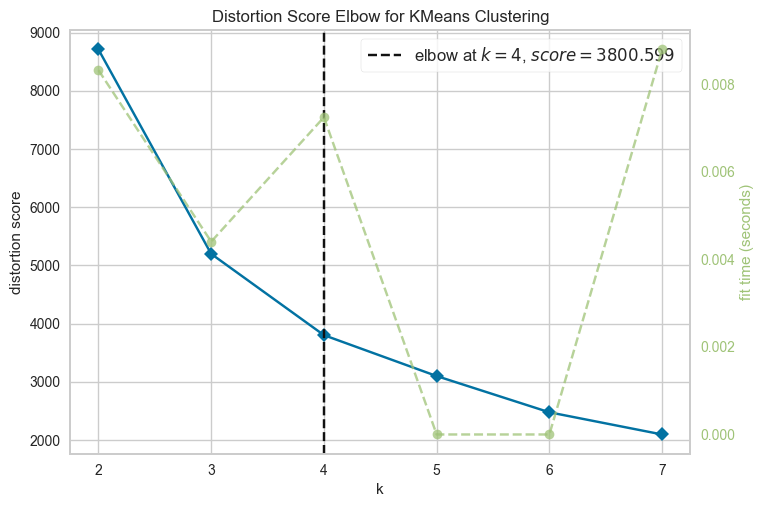

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=7)
Elbow_M.fit(X)
Elbow_M.show()

In [43]:
# Choose optimal clusters based on the elbow point
optimal_clusters = 4 

# Apply K-Means with Optimal Clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(pca_features)

# Add K-Means labels to the DataFrame
df['Cluster_KMeans'] = kmeans_labels

In [44]:
df['Cluster_KMeans'].value_counts()

Cluster_KMeans
0    1313
1     855
3     685
2     297
Name: count, dtype: int64

Silhouette Score for K-Means with 4 clusters: 0.43014779407933884


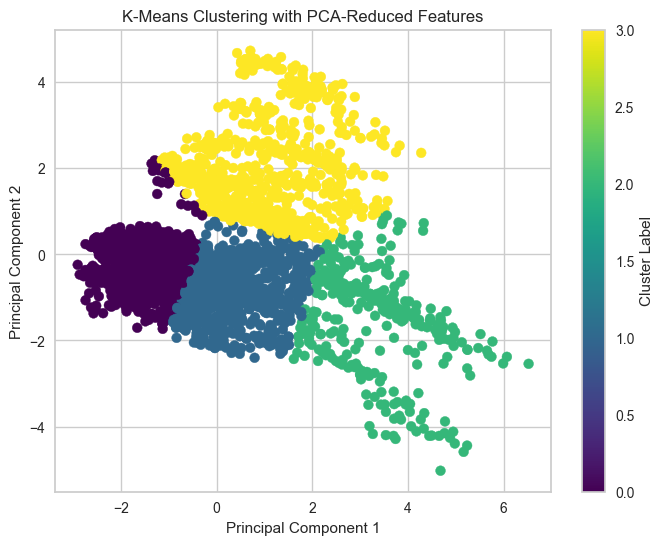

Cluster Centroids in PCA-Reduced Space:
[[-1.53343411 -0.17721552]
 [ 0.32919841 -0.79572942]
 [ 3.35678882 -1.57781327]
 [ 1.08382278  2.01338558]]


In [45]:
# Evaluate Silhouette Score for K-Means
silhouette_avg_kmeans = silhouette_score(pca_features, kmeans_labels)
print(f"Silhouette Score for K-Means with {optimal_clusters} clusters: {silhouette_avg_kmeans}")

# Visualize K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering with PCA-Reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Analyze Cluster Centroids
centroids = kmeans_optimal.cluster_centers_
print("Cluster Centroids in PCA-Reduced Space:")
print(centroids)

In [46]:
df.sample(5)

,Customer_ID,call_failure,complains,sub_length,charge_amount,total_sec_calls,total_num_sms,distinct_call_nums,tariff_plan,status,age,customer_value,Churn,Cluster_KMeans
1976,24354,0,0,32,0,1975,0,14,1,2,25,89.955,1,0
757,23135,11,0,32,1,9115,136,42,1,1,30,913.200,0,3
710,23088,4,0,38,0,5728,0,9,1,1,30,232.880,0,0
645,23023,16,0,16,0,6278,53,38,2,1,15,644.215,0,1
194,22572,3,0,22,1,1775,38,18,1,1,25,252.135,0,0


In [47]:
df.to_csv('segments.csv')

## Segment Visualization(PowerBI)

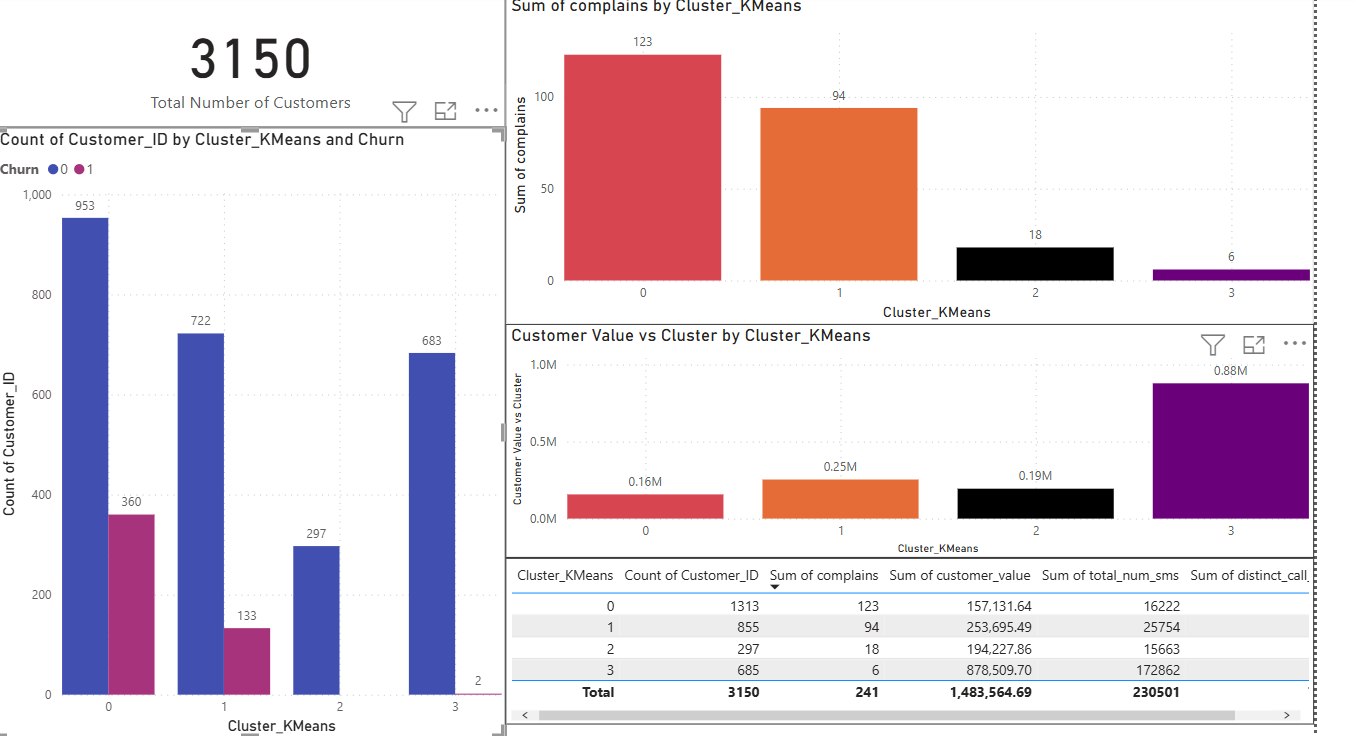

# Proposed Segments
### Based on clustering analysis, we can divide customers into the following segments:
## A.High-Value Users (Premium Customers)
####  Characteristics:
- High customer_value, value_per_call, and value_per_sec.
-Moderate to high total_sec_calls and total_num_calls.
-Likely low sms_to_call_ratio.
#### Actions:
- Offer loyalty rewards to retain them.
- Provide premium plans with additional features or discounts on overages.
- Upsell add-on services (e.g., data, international calling).
## B. Cost-Conscious Users
####  Characteristics:
- Moderate to low customer_value and charge_amount.
- Relatively high sms_to_call_ratio and call_to_unique_ratio.
- Preference for low-cost communication (SMS-heavy).
#### Actions:
- Promote affordable plans with more SMS or bundled services.
- Educate on data-centric apps for communication.
## C. High-Usage, Low-Value Users
####  Characteristics:
- High total_num_calls or total_sec_calls but low customer_value.
- Low value_per_call or value_per_sec.
#### Actions:
- Encourage plan upgrades to higher tiers that align with their usage.
- Upsell to bundles that reduce cost-per-use while increasing revenue.
## D. Low-Usage Users (Dormant/At-Risk)
####  Characteristics:
- Low total_sec_calls, total_num_calls, and customer_value.
- May have complains or be nearing churn (Churn = 1).
#### Actions:
- Offer retention plans with discounts or trial features.
- Reach out with personalized campaigns to understand their needs.
- Incentivize higher engagement (e.g., bonus for usage).
## E. Social Networkers
####  Characteristics:
- High call_to_unique_ratio but moderate total_num_calls.
#### Actions:
- Provide plans tailored for social users (e.g., unlimited calls to diverse networks).
- Offer referral bonuses or group plans for friends/family.